In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
path = '/sciserver/filedb02-02/ocean/wenrui_temp/dic_exp/dic_budget_0001/'

In [20]:
files = os.listdir(path)

In [21]:
files

['dicDiag.0005184000.t001.nc',
 'dicDiag.0005184000.t002.nc',
 'dicDiag.0005184000.t003.nc',
 'dicDiag.0005184000.t004.nc',
 'dicDiag.0005196130.t001.nc',
 'dicDiag.0005196130.t002.nc',
 'dicDiag.0005196130.t003.nc',
 'dicDiag.0005196130.t004.nc',
 'dicDiag.0005208250.t001.nc',
 'dicDiag.0005208250.t002.nc',
 'dicDiag.0005208250.t003.nc',
 'dicDiag.0005208250.t004.nc',
 'dic_tave.0005184000.t001.nc',
 'dic_tave.0005184000.t002.nc',
 'dic_tave.0005184000.t003.nc',
 'dic_tave.0005184000.t004.nc',
 'dynDiag.0005184000.t001.nc',
 'dynDiag.0005184000.t002.nc',
 'dynDiag.0005184000.t003.nc',
 'dynDiag.0005184000.t004.nc',
 'gm_tave.0005184000.t001.nc',
 'gm_tave.0005184000.t002.nc',
 'gm_tave.0005184000.t003.nc',
 'gm_tave.0005184000.t004.nc',
 'grid.t001.nc',
 'grid.t002.nc',
 'grid.t003.nc',
 'grid.t004.nc',
 'myDiag.0005184000.t001.nc',
 'myDiag.0005184000.t002.nc',
 'myDiag.0005184000.t003.nc',
 'myDiag.0005184000.t004.nc',
 'phiHyd.0005184000.t001.nc',
 'phiHyd.0005184000.t002.nc',
 'ph

In [25]:
prefixs = ['po4Diag','dicDiag','dynDiag',
           'ptracers','surfDiag','myDiag',
           'state','dic_tave']
tags = ['t001.nc','t002.nc','t003.nc','t004.nc']

In [26]:
def open_match(var,tile):
    # print([path+i for i in files if var in i and tile in i])
    return xr.concat([xr.open_dataset(path+i) for i in files if var in i and tile in i],dim = 'T')

In [27]:
_ = open_match(prefixs[5],tags[0])

In [28]:
_

<xarray.Dataset>
Dimensions:      (T: 3000, Zmd000015: 15, X: 64, Y: 32)
Coordinates:
  * T            (T) float64 2.239e+11 2.239e+11 ... 2.252e+11 2.252e+11
  * X            (X) float64 1.406 4.219 7.031 9.844 ... 170.2 173.0 175.8 178.6
  * Y            (Y) float64 -88.59 -85.78 -82.97 ... -7.031 -4.219 -1.406
Dimensions without coordinates: Zmd000015
Data variables:
    iter         (T) int32 5184010 5184020 5184030 ... 5213980 5213990 5214000
    diag_levels  (T, Zmd000015) float64 1.0 2.0 3.0 4.0 ... 12.0 13.0 14.0 15.0
    UDIAG1       (T, Zmd000015, Y, X) float32 0.0 0.0 0.0 ... 0.0 0.0 4.714e-14
    UDIAG2       (T, Zmd000015, Y, X) float32 0.0 0.0 0.0 ... 0.0 0.0 4.145e-34
Attributes: (12/22)
    the_run_name:    Tutorial Biogeo
    MITgcm_version:  checkpoint68v
    build_user:      wenrui
    build_host:      login02
    build_date:      Wed Apr  3 16:46:43 EDT 2024
    MITgcm_URL:      http://mitgcm.org
    ...              ...
    nSy:             2
    nPx:             2
    nPy:             1
    Nx:              128
    Ny:              64
    Nr:              15

In [29]:
%%time
dddd = []
for j in range(len(prefixs)):
    # dddd.append(xr.open_dataset(path+prefixs[j]+tags[1]).drop_vars('iter'))
    print(prefixs[j][:8],end = ' ')
    datasets = [open_match(prefixs[j],tags[i]) for i in range(4)]
    half1 = datasets[0].combine_first(datasets[1])
    half2 = datasets[2].combine_first(datasets[3])
    sub = half1.combine_first(half2)
    dddd.append(sub.drop_vars('iter'))

po4Diag dicDiag dynDiag ptracers surfDiag myDiag state dic_tave CPU times: user 17min 47s, sys: 15min 30s, total: 33min 18s
Wall time: 57min 48s


In [30]:
dddd[5]

<xarray.Dataset>
Dimensions:      (T: 3000, Zmd000015: 15, Y: 64, X: 128)
Coordinates:
  * T            (T) float64 2.239e+11 2.239e+11 ... 2.252e+11 2.252e+11
  * X            (X) float64 1.406 4.219 7.031 9.844 ... 350.2 353.0 355.8 358.6
  * Y            (Y) float64 -88.59 -85.78 -82.97 -80.16 ... 82.97 85.78 88.59
Dimensions without coordinates: Zmd000015
Data variables:
    diag_levels  (T, Zmd000015) float64 1.0 2.0 3.0 4.0 ... 12.0 13.0 14.0 15.0
    UDIAG1       (T, Zmd000015, Y, X) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    UDIAG2       (T, Zmd000015, Y, X) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes: (12/22)
    the_run_name:    Tutorial Biogeo
    MITgcm_version:  checkpoint68v
    build_user:      wenrui
    build_host:      login02
    build_date:      Wed Apr  3 16:46:43 EDT 2024
    MITgcm_URL:      http://mitgcm.org
    ...              ...
    nSy:             2
    nPx:             2
    nPy:             1
    Nx:              128
    Ny:              64
    Nr:              15

In [35]:
ddd = []
for sub in dddd:
    if len(sub.T)%2==0:
        ddd.append(sub.rename({'T':'time'}))
    else:
        ddd.append(sub.rename({'T':'time_outer'}))

In [36]:
ddd[5]

<xarray.Dataset>
Dimensions:      (time: 3000, Zmd000015: 15, Y: 64, X: 128)
Coordinates:
  * time         (time) float64 2.239e+11 2.239e+11 ... 2.252e+11 2.252e+11
  * X            (X) float64 1.406 4.219 7.031 9.844 ... 350.2 353.0 355.8 358.6
  * Y            (Y) float64 -88.59 -85.78 -82.97 -80.16 ... 82.97 85.78 88.59
Dimensions without coordinates: Zmd000015
Data variables:
    diag_levels  (time, Zmd000015) float64 1.0 2.0 3.0 4.0 ... 13.0 14.0 15.0
    UDIAG1       (time, Zmd000015, Y, X) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    UDIAG2       (time, Zmd000015, Y, X) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes: (12/22)
    the_run_name:    Tutorial Biogeo
    MITgcm_version:  checkpoint68v
    build_user:      wenrui
    build_host:      login02
    build_date:      Wed Apr  3 16:46:43 EDT 2024
    MITgcm_URL:      http://mitgcm.org
    ...              ...
    nSy:             2
    nPx:             2
    nPy:             1
    Nx:              128
    Ny:              64
    Nr:              15

In [37]:
%%time
ds = xr.merge(ddd,compat='override')

ds = ds.squeeze().rename({'Zmd000015':'Z','Zld000015':'Zl'})

grids = [i for i in files if 'grid' in i]
grids = [xr.open_dataset(path+i) for i in grids]

half1 = grids[0].combine_first(grids[1])
half2 = grids[2].combine_first(grids[3])
grids = half1.combine_first(half2)

ds = xr.merge([ds,grids])

CPU times: user 846 ms, sys: 1.17 s, total: 2.02 s
Wall time: 3.85 s


In [38]:
ds = ds.rename({
    'UDIAG1':'DICPFLX',
    'UDIAG2':'DICRDOP'
})

In [44]:
to_preserve = [#'AB_gTr01','AB_gTr03',
    'ADVrTr01','ADVrTr03','ADVxTr01','ADVxTr03',
    'ADVyTr01','ADVyTr03','DFrETr01','DFrETr03','DFrITr01','DFrITr03',
    'DFxETr01','DFxETr03','DFyETr01','DFyETr03',
    'DIC','DICBIOA','DICCARB','DICCFLX','DICOFLX','DICTFLX','Depth','Eta',\
    'ForcTr01','ForcTr03','GM_PsiX','GM_PsiY','HFacC','HFacS','HFacW',
    'PO4','TRAC01','TRAC03','Tp_gTr01','Tp_gTr03','UVELMASS','VVELMASS',
    'WTRAC01','WTRAC03','WVELMASS','XC','XG','YC','YG',
    'dic_pflux_ave',
    'DICPFLX','DICRDOP',
    'S','Temp',
    'drC','drF','dxC','dxF','dxG','dxV','dyC','dyF','dyG','dyU','rA','rAs','rAw','rAz']
out = ds[to_preserve]

In [48]:
out['DICPFLX']

<xarray.DataArray 'DICPFLX' (time: 3000, Z: 15, Y: 64, X: 128)>
array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
...
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]]], dtype=float32)
Coordinates:
  * time     (time) float64 2.239e+11 2.239e+11 2.24e+11 ... 2.252e+11 2.252e+11
  * X        (X) float64 1.406 4.219 7.031 9.844 ... 350.2 353.0 355.8 358.6
  * Y        (Y) float64 -88.59 -85.78 -82.97 -80.16 ... 80.16 82.97 85.78 88.59
  * Z        (Z) float64 -25.0 -85.0 -170.0 ... -3.575e+03 -4.19e+03 -4.855e+03
Attributes:
    description:  User-Defined Model-Level Diagnostic  #1
    units:        user-defined

In [49]:
out = out.chunk({'time':20,'time_outer':20,"Z": 15,"Y": 64,"X": 128,"Zl": 15,"Xp1": 129,"Yp1": 65,"Zp1": 16})

KeyboardInterrupt: 

In [ ]:
out.to_zarr('/sciserver/filedb02-02/ocean/wenrui_temp/dic_exp/bgc_tutorial.zarr', mode = 'w')

In [ ]:
ds.nbytes/1e9

In [98]:
ds

<xarray.Dataset>
Dimensions:          (time: 1500, Z: 15, Y: 64, X: 128, Xp1: 129, Yp1: 65,
                      Zl: 15, time_outer: 1501, Zp1: 16, Zu: 15)
Coordinates:
  * time             (time) float64 2.239e+11 2.239e+11 ... 2.246e+11 2.246e+11
  * X                (X) float64 1.406 4.219 7.031 9.844 ... 353.0 355.8 358.6
  * Y                (Y) float64 -88.59 -85.78 -82.97 ... 82.97 85.78 88.59
  * Xp1              (Xp1) float64 0.0 2.812 5.625 8.438 ... 354.4 357.2 360.0
  * Yp1              (Yp1) float64 -90.0 -87.19 -84.38 ... 84.38 87.19 90.0
  * time_outer       (time_outer) float64 2.239e+11 2.239e+11 ... 2.246e+11
  * Z                (Z) float64 -25.0 -85.0 -170.0 ... -4.19e+03 -4.855e+03
  * Zl               (Zl) float64 0.0 -50.0 -120.0 ... -3.87e+03 -4.51e+03
  * Zp1              (Zp1) float64 0.0 -50.0 -120.0 ... -4.51e+03 -5.2e+03
  * Zu               (Zu) float64 -50.0 -120.0 -220.0 ... -4.51e+03 -5.2e+03
Data variables: (12/88)
    diag_levels      (time, Z) float64 1.0 2.0 3.0 4.0 ... 12.0 13.0 14.0 15.0
    TRAC03           (time, Z, Y, X) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ADVxTr03         (time, Z, Y, Xp1) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    ADVyTr03         (time, Z, Yp1, X) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    ADVrTr03         (time, Zl, Y, X) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    DFxETr03         (time, Z, Y, Xp1) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    ...               ...
    R_low            (Y, X) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    Ro_surf          (Y, X) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    Depth            (Y, X) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    HFacC            (Z, Y, X) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    HFacW            (Z, Y, Xp1) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    HFacS            (Z, Yp1, X) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/22)
    the_run_name:    Tutorial Biogeo
    MITgcm_version:  checkpoint68v
    build_user:      wenrui
    build_host:      login01
    build_date:      Wed Mar 13 16:17:51 EDT 2024
    MITgcm_URL:      http://mitgcm.org
    ...              ...
    nSy:             2
    nPx:             1
    nPy:             1
    Nx:              128
    Ny:              64
    Nr:              15

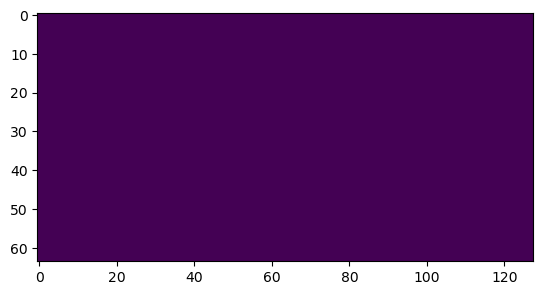

In [103]:
plt.imshow(ds.AB_gTr01[1,1])

In [104]:
(ds.AB_gTr01==0).all()

<xarray.DataArray 'AB_gTr01' ()>
array(True)